## Bibliothèque 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib
import math


## Data Exploration


In [21]:
file_path = 'Co2.csv'
data = pd.read_csv(file_path)

data.head()

,Sex,Âge,Pays,Consommation_KWh,Moyen_de_transport,Nombre_de_KM,Classe_énergétique,Surface_maison_M2,Kg_CO2_Total_Hebdo
0,Male,56,France,891,Bus,4707,A,300,8.09
1,Male,69,Germany,1237,Voiture (diesel),1648,C,150,12.56
2,Female,46,Germany,664,Train (intercités),12358,F,75,9.77
3,Male,32,South Africa,1034,Train (intercités),18204,B,75,21.68
4,Male,60,Brazil,1361,Moto,7773,A,300,17.04


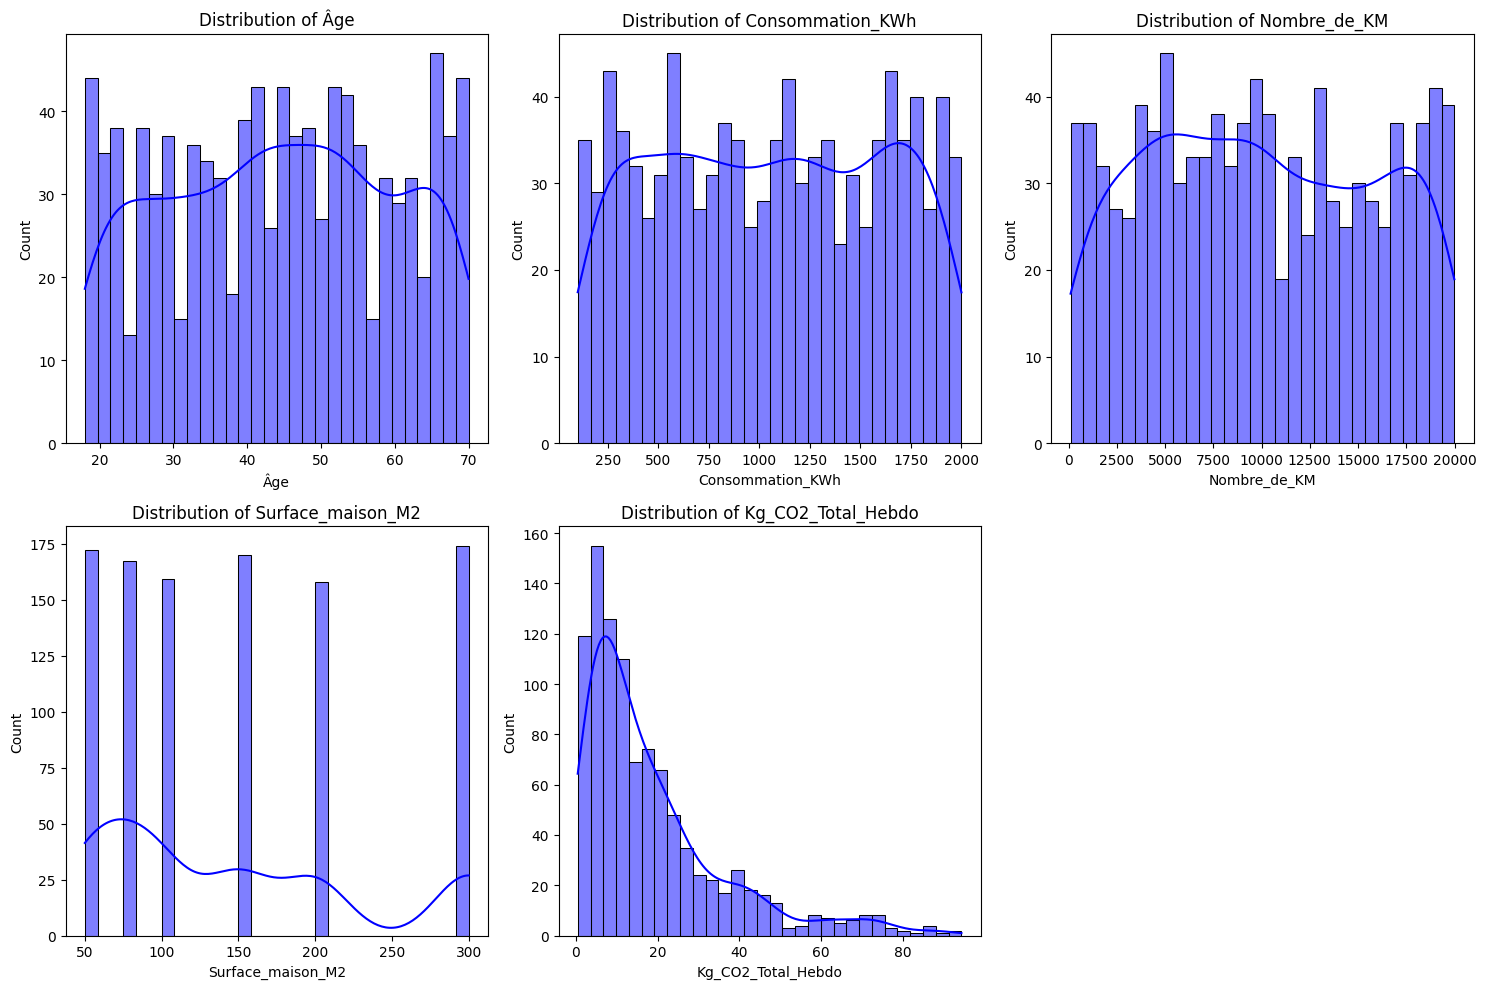

In [22]:
# Visualize the distributions of numerical variables

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Calculate the number of rows and columns for the subplot grid
num_cols = len(numeric_columns)
grid_rows = math.ceil(num_cols / 3)  # Adjust to 3 columns per row

# Create dynamic subplots
plt.figure(figsize=(15, 5 * grid_rows))
for i, column in enumerate(numeric_columns):
    plt.subplot(grid_rows, 3, i + 1)  # Grid of 3 columns
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


                         Âge  Consommation_KWh  Nombre_de_KM  \
Âge                 1.000000         -0.067253     -0.007818   
Consommation_KWh   -0.067253          1.000000      0.031264   
Nombre_de_KM       -0.007818          0.031264      1.000000   
Surface_maison_M2  -0.017789         -0.032783     -0.033793   
Kg_CO2_Total_Hebdo -0.008697          0.252584      0.393858   

                    Surface_maison_M2  Kg_CO2_Total_Hebdo  
Âge                         -0.017789           -0.008697  
Consommation_KWh            -0.032783            0.252584  
Nombre_de_KM                -0.033793            0.393858  
Surface_maison_M2            1.000000           -0.033854  
Kg_CO2_Total_Hebdo          -0.033854            1.000000  


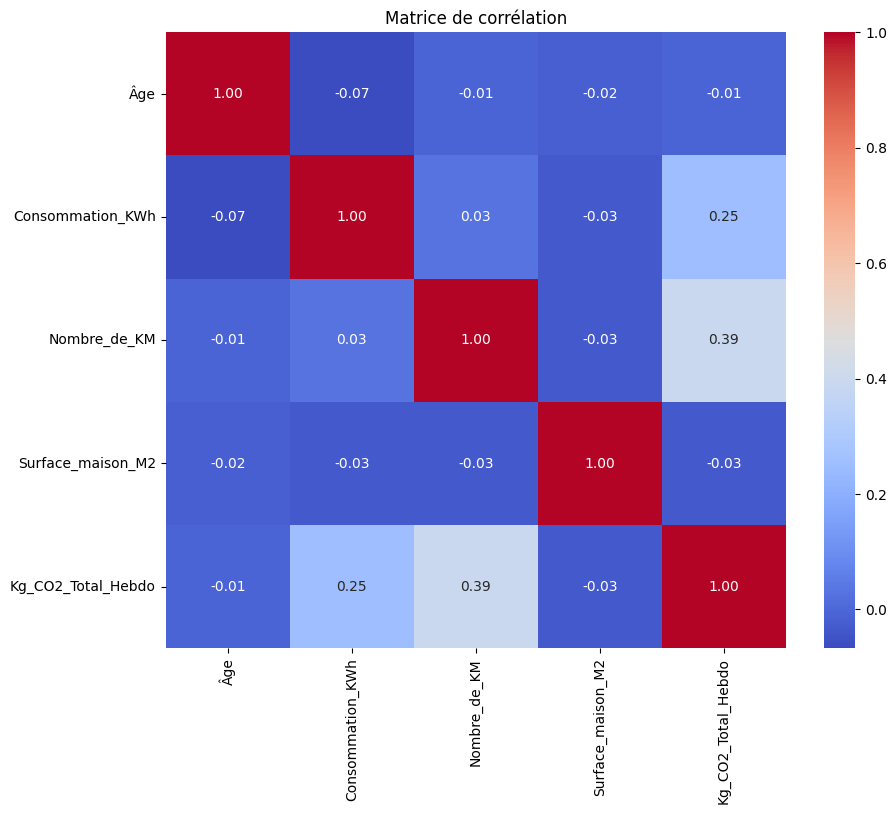

In [23]:
# Identify only numerical columns for correlation
correlation_data = data.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

## Data Cleaning

In [24]:
# Handle missing values
data = data.dropna()

# Encoding categorical columns
categorical_columns = ['Sex', 'Pays', 'Moyen_de_transport', 'Classe_énergétique']
encoded_data = data.copy()

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    label_encoders[col] = le

# Normalizing numerical columns
scaler = MinMaxScaler()
encoded_data[numeric_columns] = scaler.fit_transform(encoded_data[numeric_columns])

print(encoded_data.head())


   Sex       Âge  Pays  Consommation_KWh  Moyen_de_transport  Nombre_de_KM  \
0    1  0.730769     4          0.416008                   0      0.231585   
1    1  0.980769     5          0.598210                   8      0.077782   
2    0  0.538462     5          0.296472                   5      0.616270   
3    1  0.269231     7          0.491311                   5      0.910202   
4    1  0.807692     1          0.663507                   1      0.385741   

   Classe_énergétique  Surface_maison_M2  Kg_CO2_Total_Hebdo  
0                   0                1.0            0.081343  
1                   2                0.4            0.128998  
2                   5                0.1            0.099254  
3                   1                0.1            0.226226  
4                   0                1.0            0.176759  


# Traning ML 

In [25]:

# cible target_column = 'Kg_CO2_Total_Hebdo'
target_column = 'Kg_CO2_Total_Hebdo'  
X = encoded_data.drop([target_column, 'Id', 'Identifiant'], axis=1, errors='ignore') 
y = encoded_data[target_column]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")
print(f"Taille de y_train : {y_train.shape}")
print(f"Taille de y_test : {y_test.shape}")

Taille de X_train : (800, 8)
Taille de X_test : (200, 8)
Taille de y_train : (800,)
Taille de y_test : (200,)


In [26]:

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.026173196611376626
R² Score: 0.2072626364558534


### Linear Regression Results

The linear regression model yielded a very low R² score of 0.20, indicating that only 20% of the variance in the target variable is explained by the model. Given this poor performance, we will not retain the linear regression model and will instead move towards a more suitable model for this type of data: Random Forest.

In [27]:

# Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R² Score: {rf_r2}")

# Extract feature importance
rf_feature_importances = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(rf_importance_df)


Mean Squared Error (MSE): 0.0025333309390528336
R² Score: 0.9232701255628579

Feature Importance:
              Feature  Importance
4  Moyen_de_transport    0.498100
5        Nombre_de_KM    0.374471
3    Consommation_KWh    0.062598
2                Pays    0.043705
1                 Âge    0.008314
6  Classe_énergétique    0.005618
7   Surface_maison_M2    0.005561
0                 Sex    0.001633


### Random Forest Model Performance

The Random Forest model achieved a high R² score of 0.92, indicating that 92% of the variance in the target variable is explained by the model. This high level of precision demonstrates that the Random Forest model is well-suited for our dataset and significantly outperforms the Linear Regression model. Given its superior performance, we will proceed with deploying the Random Forest model.


In [ ]:
# Save the Random Forest model to a file.
model_filename = 'co2_emission_random_forest_model.pkl'

joblib.dump(rf_model, model_filename)

print(f"Save the Random Forest model to a file : {model_filename}")


Save the Random Forest model to a file : co2_emission_random_forest_model.pkl
